In [1]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
from scipy.io.wavfile import write
import speech_recognition as sr
from audiomentations import Compose, AddGaussianNoise, PitchShift, HighPassFilter
import soundfile as sf

In [2]:
import pyttsx3

In [3]:
engine = pyttsx3.init('sapi5')
voices = engine.getProperty('voices')
# print(voices[1].id)
engine.setProperty('voice', voices[0].id)


def speak(audio):
    engine.say(audio)
    engine.runAndWait()


In [4]:
from pydub import AudioSegment

In [5]:
import pandas as pd

In [6]:
#! pip install librosa
#! pip install mir_eval
import librosa
import librosa.display as dsp
import mir_eval
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np

In [7]:
metadata=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\metadata.csv")

In [8]:
metadata

,class,location,total
0,chiranjeevi original-,F:\project\chiranjeevi original,65
1,chiru,F:\project\chiru,35
2,ANR mimicry-,F:\project\ANR mimicry,37
3,ANR original-,F:\project\ANR original,50


In [9]:
x=metadata
#print(str(x.iloc[i,1])+ str("\\")+ str(x.iloc[i,0])+str(x.iloc[i,2]+1)+".wav")

i=0
j=1
k= str(x.iloc[i,1])+ str("\\")+ str(x.iloc[i,0])+str(j)+ ".wav"
signal, sr = librosa.load(k)
augmented_signal = augment_raw_audio(signal, sr)
path =str(x.iloc[i,1])+ str("\\")+ str(x.iloc[i,0])+str(x.iloc[i,2]+1)+".wav"
f= open(p,"w+")
sf.write(p+"guru99.wav", augmented_signal, sr)

In [12]:
def f(x):
    y=[]
    for i in range(len(x.iloc[:,0])):
        
        for j in range(1,int(x.iloc[i,2])):
            
            k= str(x.iloc[i,1])+ str("\\")+ str(x.iloc[i,0])+str(j)+ ".wav"
            audio,sample_rate = librosa.load(k,res_type='kaiser_fast')
            
            mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
            mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
            b=list(mfccs_scaled_features)
            b.append(x.iloc[i,0])
            y.append(b)
    return y

In [13]:
y= f(metadata)

In [14]:
len(y)

183

In [15]:
edf=pd.DataFrame(y,columns = [x for x in range(41)])

In [16]:
cl=edf.columns

In [17]:
edf

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-206.915649,100.187340,-32.213154,35.693474,-9.092731,16.664572,-5.313095,9.479670,-20.473705,6.460907,...,0.674733,-1.147056,-1.813995,-1.432564,0.856860,0.838472,2.971595,4.306870,3.671580,chiranjeevi original-
1,-168.503799,92.796013,-43.470993,44.681686,-9.913730,18.575882,-12.464251,16.839586,-20.355118,2.868820,...,3.128470,5.135781,4.589956,2.972625,5.682449,7.099750,6.227372,6.285898,5.299379,chiranjeevi original-
2,-259.355194,84.782806,-32.544975,34.884106,2.299232,14.806336,-10.628572,3.841967,-21.005394,4.796550,...,0.359363,-1.479052,0.661695,-1.770656,0.823466,-0.450124,0.577029,1.828550,2.666865,chiranjeevi original-
3,-304.515564,107.515808,-34.179028,29.284449,11.141503,11.212320,-6.000972,7.561637,-19.814968,3.140187,...,1.544027,-0.211164,0.011923,-1.396156,0.286330,-1.139802,-1.681980,0.924567,2.572811,chiranjeevi original-
4,-261.992157,84.354660,-31.479340,24.127695,-2.888325,11.604282,-7.427988,10.674010,-13.976500,10.212080,...,3.961703,1.596172,4.365419,4.963208,7.788960,6.138669,4.439319,3.514583,3.402252,chiranjeevi original-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,-323.300873,146.807388,-3.362075,13.176831,9.660857,7.852194,1.310507,6.758285,-2.529438,-16.538561,...,-1.011140,-2.352942,-4.106233,-2.915109,-2.218339,-3.907215,-5.772194,-1.898642,0.672968,ANR original-
179,-280.341278,141.334366,-4.940029,19.982378,5.714639,12.433653,2.284604,4.212228,-3.063920,-19.621639,...,-2.004070,-4.628380,-7.135531,-2.596452,-1.744920,-3.862128,-4.752705,-0.192972,3.648925,ANR original-
180,-311.059814,132.339874,14.725657,5.609408,3.556596,5.717206,5.731790,7.778067,-5.706516,-16.303764,...,-3.419457,-4.351867,-5.549552,-3.705515,-1.393068,-3.653743,-5.119195,-2.106163,-0.481370,ANR original-
181,-327.353058,125.258247,14.776396,12.641444,6.073719,7.503607,3.839661,4.461445,-2.915198,-14.432652,...,-0.732903,-2.518379,-4.266646,-3.088290,-1.923386,-2.731606,-3.059264,0.102165,1.737047,ANR original-


data visualization

In [18]:
p=list(set(edf.iloc[:,-1]))
l=[]
for i in p:
    l.append(edf[edf.iloc[:,-1]==i])

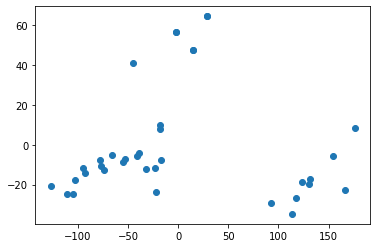

In [19]:
#plt.subplot(2,2)
import seaborn
#sns.plot()
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
v_m= pca.fit_transform(l[3].iloc[:,0:39])
plt.scatter(v_m[:,0],v_m[:,1])

In [20]:
from sklearn.preprocessing import LabelEncoder
ohe=LabelEncoder()
ohe.fit(edf.iloc[:,-1])

LabelEncoder()

In [21]:
#edf.iloc[:,-1]=ohe.transform(edf.iloc[:,-1])

In [22]:
edf

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-206.915649,100.187340,-32.213154,35.693474,-9.092731,16.664572,-5.313095,9.479670,-20.473705,6.460907,...,0.674733,-1.147056,-1.813995,-1.432564,0.856860,0.838472,2.971595,4.306870,3.671580,chiranjeevi original-
1,-168.503799,92.796013,-43.470993,44.681686,-9.913730,18.575882,-12.464251,16.839586,-20.355118,2.868820,...,3.128470,5.135781,4.589956,2.972625,5.682449,7.099750,6.227372,6.285898,5.299379,chiranjeevi original-
2,-259.355194,84.782806,-32.544975,34.884106,2.299232,14.806336,-10.628572,3.841967,-21.005394,4.796550,...,0.359363,-1.479052,0.661695,-1.770656,0.823466,-0.450124,0.577029,1.828550,2.666865,chiranjeevi original-
3,-304.515564,107.515808,-34.179028,29.284449,11.141503,11.212320,-6.000972,7.561637,-19.814968,3.140187,...,1.544027,-0.211164,0.011923,-1.396156,0.286330,-1.139802,-1.681980,0.924567,2.572811,chiranjeevi original-
4,-261.992157,84.354660,-31.479340,24.127695,-2.888325,11.604282,-7.427988,10.674010,-13.976500,10.212080,...,3.961703,1.596172,4.365419,4.963208,7.788960,6.138669,4.439319,3.514583,3.402252,chiranjeevi original-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,-323.300873,146.807388,-3.362075,13.176831,9.660857,7.852194,1.310507,6.758285,-2.529438,-16.538561,...,-1.011140,-2.352942,-4.106233,-2.915109,-2.218339,-3.907215,-5.772194,-1.898642,0.672968,ANR original-
179,-280.341278,141.334366,-4.940029,19.982378,5.714639,12.433653,2.284604,4.212228,-3.063920,-19.621639,...,-2.004070,-4.628380,-7.135531,-2.596452,-1.744920,-3.862128,-4.752705,-0.192972,3.648925,ANR original-
180,-311.059814,132.339874,14.725657,5.609408,3.556596,5.717206,5.731790,7.778067,-5.706516,-16.303764,...,-3.419457,-4.351867,-5.549552,-3.705515,-1.393068,-3.653743,-5.119195,-2.106163,-0.481370,ANR original-
181,-327.353058,125.258247,14.776396,12.641444,6.073719,7.503607,3.839661,4.461445,-2.915198,-14.432652,...,-0.732903,-2.518379,-4.266646,-3.088290,-1.923386,-2.731606,-3.059264,0.102165,1.737047,ANR original-


##preprocessing

In [23]:
x_train, x_test, y_train,y_test =train_test_split(edf.iloc[:,0:40],edf[40])

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D_t= pca.fit_transform(x_test)

In [25]:
X2D_t= pca.fit_transform(x_test)

In [26]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
44,-305.903748,136.767487,-21.158831,8.689246,1.264073,-9.472857,-15.904866,-6.767755,-22.586054,-4.302612,...,-1.555829,1.806672,1.826841,0.052386,0.930716,-0.991762,-2.913344,-0.822944,-3.418969,-3.153448
65,-175.521408,113.198578,-9.703684,6.807632,-25.204927,-16.207237,-9.449834,9.714764,-20.350412,1.679502,...,-0.295250,1.693194,0.858459,0.912394,0.477799,-1.167284,-0.398785,-0.217803,1.345418,1.460822
18,-313.411621,136.260345,-22.847345,23.661484,-3.566035,-0.012856,-9.639300,-4.781059,-19.946249,-4.297126,...,0.202950,-0.457577,3.554882,-0.277863,-0.002961,-0.825653,-2.256764,-1.558542,-2.628232,-2.675112
39,-304.547333,138.374115,-8.341937,24.464441,-17.815441,-7.079212,-11.706789,-1.044791,-18.399317,-7.092944,...,-1.148782,1.427197,1.723675,0.702057,1.771227,-0.474988,-0.938377,0.153156,-2.944817,-1.235038
150,-289.125275,142.745438,-3.469182,15.600102,3.519384,4.819232,3.596853,5.404217,-4.948727,-17.315500,...,-2.411105,-1.665496,-1.988060,-4.124808,-2.106626,-0.753799,-2.052995,-2.396672,2.585941,6.181386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,-456.640991,114.744415,-65.722954,1.116204,6.072038,-8.319281,-19.219690,-13.533270,-11.740120,1.221507,...,1.042308,3.254122,0.172641,2.453609,4.139007,-0.625352,0.393855,-0.945789,-1.024489,0.048661
67,-255.189178,142.732483,19.704395,24.046423,1.555035,-5.478623,-8.050855,2.340046,-18.401297,-6.018225,...,1.557543,2.958105,2.526149,3.070998,0.697208,-0.326839,-0.215922,0.675157,0.832778,-0.554492
56,-323.943481,124.048584,-6.189987,26.021643,-14.084455,-0.248841,-10.187043,0.578658,-13.633377,-2.649216,...,0.755940,0.806551,0.545544,0.716129,0.485661,-1.140695,-1.362582,-0.666886,-1.641173,-1.238436
179,-280.341278,141.334366,-4.940029,19.982378,5.714639,12.433653,2.284604,4.212228,-3.063920,-19.621639,...,-5.101983,-2.004070,-4.628380,-7.135531,-2.596452,-1.744920,-3.862128,-4.752705,-0.192972,3.648925


# svm

Accuracy:0.891304


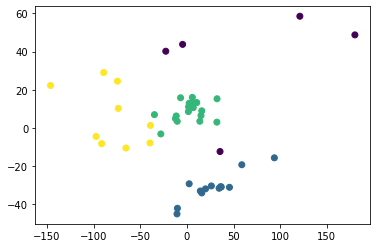

In [27]:
from sklearn import svm
clf = svm.SVC(kernel="poly", degree=3,  C=4)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy:{0:f}'.format(score))
ohe.fit(y_pred)
p=ohe.transform(y_pred)
plt.scatter(X2D_t[:, 0], X2D_t[:, 1], c=p)

In [28]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.61538462, 1.        , 1.        , 0.66666667])

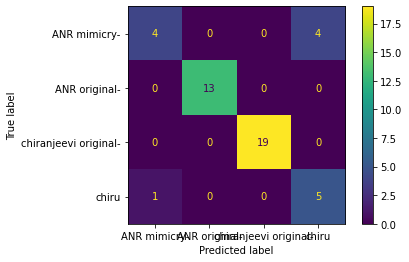

In [29]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test,y_test)  
plt.show()

# KNeighborsClassifier

Accuracy:0.956522


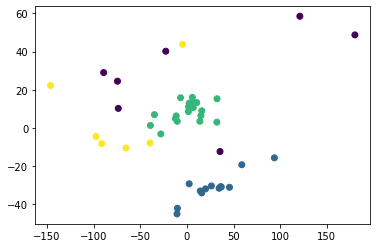

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
p=ohe.transform(y_pred)
score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy:{0:f}'.format(score))
plt.scatter(X2D_t[:, 0], X2D_t[:, 1], c=p);

In [31]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([1.        , 1.        , 0.95      , 0.83333333])

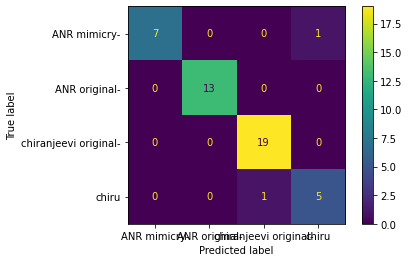

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test, y_test)  
plt.show()

In [33]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([1.        , 1.        , 0.95      , 0.83333333])

# Decision Tree


Accuracy:0.826087


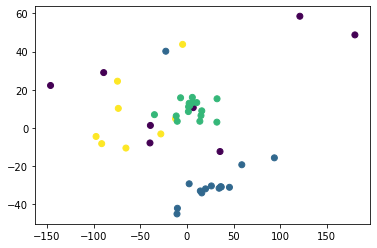

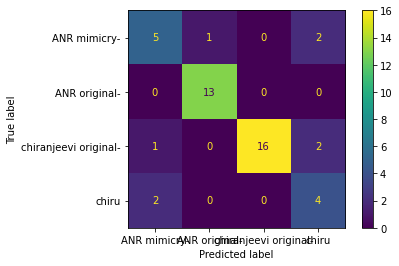

In [34]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
D_clf = clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
p=ohe.transform(y_pred)
score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy:{0:f}'.format(score))
plt.scatter(X2D_t[:, 0], X2D_t[:, 1], c=p)
plot_confusion_matrix(D_clf, x_test, y_test)  
plt.show()

In [35]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.625     , 0.92857143, 1.        , 0.5       ])

In [36]:
import speech_recognition as sr #pip install speechRecognition
def initialrecording():
    with sr.Microphone() as source:
        print("Listening...\n")
        print("speak .. something ...\n")
        r.pause_threshold = 1
        audio = r.listen(source)
        path =str(x.iloc[i,1])+ str("\\")+ str(x.iloc[i,0]) # required path
        f= open(path,"w+")
        sf.write(path, augmented_signal, sr)
    try:
        print("Recognizing...")
        directory = "new"
        parent_dir = "F:\\project"
        path = os.path.join(parent_dir, directory)
        os.mkdir(path)
        split_wav = SplitWavAudioMubin(path, file)
        split_wav.multiple_split(min_per_split=0.2)
    except Exception as e:
        # print(e)    
        print("Say that again please...")  
        return "None"
    

In [37]:
def recording(audio):
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
        print(clf.predict(mfccs_scaled_features))
        speak(str(clf.predict(mfccs_scaled_features)))

In [38]:
from pydub import AudioSegment
import math

class SplitWavAudioMubin():
    def __init__(self, folder, filename):
        self.folder = folder
        self.filename = filename
        self.filepath = folder + '\\' + filename
        
        self.audio = AudioSegment.from_wav(self.filepath)
    
    def get_duration(self):
        return self.audio.duration_seconds
    
    def single_split(self, from_min, to_min, split_filename):
        t1 = from_min * 60 * 1000
        t2 = to_min * 60 * 1000
        split_audio = self.audio[t1:t2]
        split_audio.export(self.folder + '\\' + split_filename, format="wav")
        
    def multiple_split(self, min_per_split):
        total_mins = math.ceil(self.get_duration() / 60)
        for i in range(0, total_mins, min_per_split):
            split_fn = str(i) + '_' + self.filename
            self.single_split(i, i+min_per_split, split_fn)
            print(str(i) + ' Done')
            if i == total_mins - min_per_split:
                print('All splited successfully')

In [40]:
#edf.to_csv(r'F:\project\my_data.csv', index=False)

#1Testing the model

In [ ]:
input_path="F:\project\chiru_original\9_1.wav"
audio, sample_rate=librosa.load(input_path)
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
l=[mfccs_scaled_features]
clf.predict(l)

In [65]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

skf.get_n_splits(edf.iloc[:,0:40], edf.iloc[:,-1])
y=[]
for i,j in skf.split(edf.iloc[:,0:40],edf.iloc[:,-1]):
    x_traink=edf.iloc[i,0:40]
    y_traink=edf.iloc[i,-1]
    x_testk=edf.iloc[j,0:40]
    y_testk=edf.iloc[j,-1]
    from sklearn import KNeighborsClassifier
    clf = KNeighborsClassifier(kernel="poly", degree=3,  C=4)
    clf.fit(x_traink, y_traink)
    y_predk=clf.predict(x_testk)
    score = metrics.accuracy_score(y_testk,y_predk)
    y.append(score)
    
print(sum(y)/5)
    
    

0.8033033033033034


In [66]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

skf.get_n_splits(edf.iloc[:,0:40], edf.iloc[:,-1])
y=[]
for i,j in skf.split(edf.iloc[:,0:40],edf.iloc[:,-1]):
    x_traink=edf.iloc[i,0:40]
    y_traink=edf.iloc[i,-1]
    x_testk=edf.iloc[j,0:40]
    y_testk=edf.iloc[j,-1]
    from sklearn import tree
    D_clf = tree.DecisionTreeClassifier()
    D_clf.fit(x_traink, y_traink)
    y_predk=D_clf.predict(x_testk)
    score = metrics.accuracy_score(y_testk,y_predk)
    y.append(score)
print(sum(y)/5)

0.8033033033033032


In [67]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

skf.get_n_splits(edf.iloc[:,0:40], edf.iloc[:,-1])
y=[]
for i,j in skf.split(edf.iloc[:,0:40],edf.iloc[:,-1]):
    x_traink=edf.iloc[i,0:40]
    y_traink=edf.iloc[i,-1]
    x_testk=edf.iloc[j,0:40]
    y_testk=edf.iloc[j,-1]
    from sklearn.neighbors import KNeighborsClassifier
    clf1 = KNeighborsClassifier(n_neighbors=5)
    clf1.fit(x_traink, y_traink)
    y_predk=clf1.predict(x_testk)
    score = metrics.accuracy_score(y_testk,y_predk)
    y.append(score)
print(sum(y)/5)

0.8581081081081081
